> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this analysis we are going to explore the movies data. The dataset contains data from 1960 until 2015, to this analysis I want to compare the last 3 years since is when channels like Netflix has grown up.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style="darkgrid")


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('movies.csv')
df.head(15)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

### Data Cleaning 
After load the data, it’s necessary to clean the data. First of all we have to check the missing data and fix it. 

In [3]:
df.shape


(10866, 21)

In [4]:
##Information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
##Fill the mising data 
df.fillna(df.mean(), inplace=True)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [6]:
##Check duplicates rows
sum(df.duplicated())

1

In [7]:
# Drop rows that are duplicates 
df.drop_duplicates(inplace=True)

In [8]:
##Check again duplicates rows
sum(df.duplicated())

0

In [9]:
##For the first question we are going to select the release_year 2015.
##Create a new df
df_15 = df[df['original_title'].notnull() & (df['release_year'] == 2015) & (df['revenue']!=0)]

In [10]:
df_15.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [11]:
# check if any columns contain null values
df_15.isnull().sum()

##The columns that contains null values are not relevants for the analysis

id                       0
imdb_id                  0
popularity               0
budget                   0
revenue                  0
original_title           0
cast                     0
homepage                90
director                 0
tagline                 25
keywords                19
overview                 0
runtime                  0
genres                   0
production_companies     3
release_date             0
vote_count               0
vote_average             0
release_year             0
budget_adj               0
revenue_adj              0
dtype: int64

In [12]:
# save new clean dataset
df_15.to_csv('new_movie_Data.csv', index=False)

In [38]:
##Budget and revenue can't be 0 or less to 100000
df = df[(df['budget'] >= 100000) & (df['revenue']>= 100000)]

In [14]:
## To compare the revenue during the last 3 years, create a new df 
df_year = df[(df['release_year'] >= 2013) & (df['revenue']!=0)]



In [15]:
#Save the new dataset with year equals 2013, 2014 and 2015
df_year.to_csv('new2_movie_Data.csv', index=False)

In [16]:
# Importing data from 2015
df1 = pd.read_csv('new_movie_Data.csv')
df1.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [17]:
df1.shape

(216, 21)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1-- Movies release in 2015

> Which are the movies release in 2015?, what have been the revenue for each movie? What titles have had more votes?, what have been the budget depend on the genre? 

In [18]:
##Importing data from 2013, 2014 and 2015
df_y = pd.read_csv('new2_movie_Data.csv')
df_y.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [19]:
##Creating a new df only with the revenue and release year
df_y1 = df_y[['revenue', 'release_year']]

In [20]:
##New df only with the year 2013
df_y3 = df_y1[(df_y1['release_year'] == 2013)]

In [21]:
##New df only with the year 2014
df_y4 = df_y1[(df_y1['release_year'] == 2014)]

In [22]:
##New df only with the year 2015
df_y5 = df_y1[(df_y1['release_year'] == 2015)]

In [23]:
##Sum of the 2013 revenue
rev_13_s = df_y3['revenue'].sum()

In [24]:
##Sum of the 2014 revenue
rev_14_s = df_y4['revenue'].sum()

In [25]:
##Sum of the 2015 revenue
rev_15_s = df_y5['revenue'].sum()

In [26]:
##Sum of the total revenue for 2013, 2014 and 2015
rev_total = df_y1['revenue'].sum()

In [27]:
## Percentage over total of the 2013 revenue
rev_13_porc = (rev_13_s/rev_total)*100

In [28]:
## Percentage over total of the 2014 revenue
rev_14_porc = (rev_14_s/rev_total)*100

In [29]:
## Percentage over total of the 2015 revenue
rev_15_porc = (rev_15_s/rev_total)*100

In [30]:
rev_13_porc, rev_14_porc, rev_15_porc

(32.631338776197467, 32.255188465838039, 35.113472757964495)

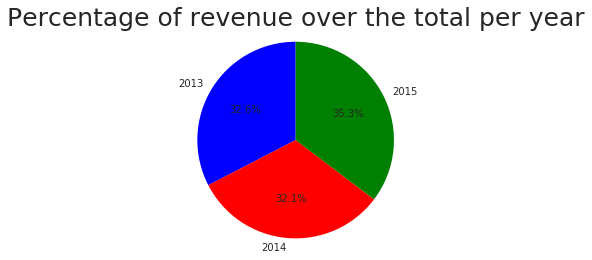

In [31]:
labels= ['2013', '2014', '2015']

colors=['blue', 'red', 'green']

sizes= [32.59, 32.10, 35.31]

plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')

plt.axis('equal')

plt.title('Percentage of revenue over the total per year',fontsize = 25)

plt.show()


The revenue has been growing up along the last 3 years. This is a good result despite of the big competition of the differents channels like Netflix.

In [32]:
##For this analysis, we first use our new file based on 2015.
##We want to analyse the titles with more revenue on 2015

revenue_dict = {}

movies_and_revenue = df1[["original_title", "revenue"]]

print(movies_and_revenue.sort_values(by="revenue", ascending=False).head(10))

                           original_title     revenue
3            Star Wars: The Force Awakens  2068178225
0                          Jurassic World  1513528810
4                               Furious 7  1506249360
14                Avengers: Age of Ultron  1405035767
8                                 Minions  1156730962
10                                Spectre   880674609
9                              Inside Out   853708609
25     Mission: Impossible - Rogue Nation   682330139
19  The Hunger Games: Mockingjay - Part 2   650523427
7                             The Martian   595380321


In [33]:
##Vote average of movies on 2015

movies_vote_average = df1[["original_title","vote_average"]]
print(movies_vote_average.sort_values(by="vote_average", ascending=False).head(10))

                     original_title  vote_average
35                             Room           8.0
9                        Inside Out           8.0
212  Requiem for the American Dream           7.8
28                        Spotlight           7.8
40           Straight Outta Compton           7.7
151                        Remember           7.7
12                       Ex Machina           7.6
27     Kingsman: The Secret Service           7.6
7                       The Martian           7.6
88                The Little Prince           7.5


The movies with the highest revenue are not the same that movies with the highest vote average. Sometimes the big titles of the year are not that good as people expected.

In [34]:
##To analyse the budget by genre, first we need to fix the genre column deleting |
hb_15 = df1[df1['genres'].str.contains('|')]
df2 = hb_15.copy()

split_columns = ['genres']
for c in split_columns:
    df2[c] = df2[c].apply(lambda x: x.split("|")[0])

new_rows = df2
new_rows    

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


In [35]:
##Budget by genre
budget_by_genre = df2[["genres","budget"]]
print(budget_by_genre.sort_values(by="budget", ascending=False).head(10))


             genres     budget
14           Action  280000000
10           Action  245000000
3            Action  200000000
4            Action  190000000
20           Action  190000000
11  Science Fiction  176000003
37        Adventure  175000000
9            Comedy  175000000
19              War  160000000
6   Science Fiction  155000000


In the present cinematic environment, movies have been able to portray extraordinary action scenes using innovative technology. As a result, action genre movies have been able to accrue the highest budgets in the industry to accomplish such scenes.

### Research Question 2  What variables are associated with the revenues of movies? 

>To answer that we are going to anylise the observations below:

>Revenue vs Popularity

>Revenue vs Vote Counts

>Revenue vs Budget

In [36]:
#Use correlation.
df.corr(method='pearson')

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,0.188878,-0.027449,-0.003206,-0.035688,0.111470,-0.001269,0.489926,-0.124035,-0.088287
popularity,0.188878,1.000000,0.446987,0.615535,0.215092,0.780096,0.317866,0.173278,0.399356,0.546959
budget,-0.027449,0.446987,1.000000,0.688556,0.260977,0.556937,0.024169,0.268040,0.958520,0.533498
revenue,-0.003206,0.615535,0.688556,1.000000,0.250298,0.754567,0.227123,0.139140,0.657567,0.900882
runtime,-0.035688,0.215092,0.260977,0.250298,1.000000,0.273771,0.351712,-0.112453,0.333976,0.280505
vote_count,0.111470,0.780096,0.556937,0.754567,0.273771,1.000000,0.387210,0.207191,0.497970,0.654688
vote_average,-0.001269,0.317866,0.024169,0.227123,0.351712,0.387210,1.000000,-0.134246,0.036803,0.266844
release_year,0.489926,0.173278,0.268040,0.139140,-0.112453,0.207191,-0.134246,1.000000,0.075103,-0.103147
budget_adj,-0.124035,0.399356,0.958520,0.657567,0.333976,0.497970,0.036803,0.075103,1.000000,0.570451
revenue_adj,-0.088287,0.546959,0.533498,0.900882,0.280505,0.654688,0.266844,-0.103147,0.570451,1.000000


We have used correlation to know what variables can be associate with the revenue of movies.

The correlations show:
 - Revenue is correlated positively with popularity and vote counts
 - Revenue is negatively correlated with vote averages.

Revenue - Popularity

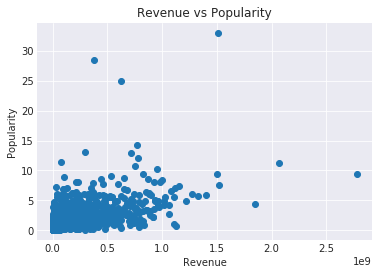

In [39]:
# Creating a scatterplot of revenue and popularity 
plt.scatter(x=df['revenue'], y=df['popularity'])
plt.xlabel('Revenue')
plt.ylabel('Popularity')
plt.title('Revenue vs Popularity');

Revenue vs Vote counts:

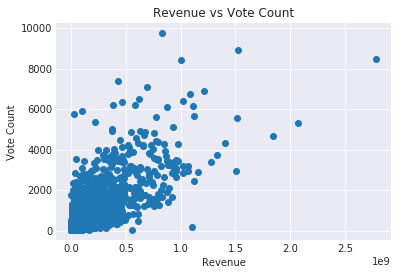

In [40]:
# Creating a scatterplot of revenue and vote counts 
plt.scatter(x=df['revenue'], y=df['vote_count'])
plt.xlabel('Revenue')
plt.ylabel('Vote Count')
plt.title('Revenue vs Vote Count');

Revenue vs Budget:

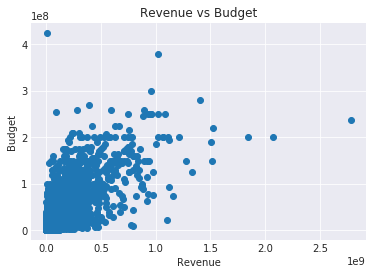

In [41]:
# Creating a scatterplot of revenue and budget
plt.scatter(x=df['revenue'], y=df['budget'])
plt.xlabel('Revenue')
plt.ylabel('Budget')
plt.title('Revenue vs Budget');

- The correlation computed from the functions are evident in the scatterplot
- Popularity is proportional to revenue.
- Vote counts is proportional to revenue.
- Budget is proportional to revenue.

Popularity, vote counts and budget are associated with the revenues of movies.
Nevertheless, in this question, we have worked with popularity, vote counts, budget and revenues but we also do not consider different revenue sources like movies ticket sales, digital sales, youtube sales, etc. and disregard the period and markets over which the revenues are collected.


<a id='conclusions'></a>
## Conclusions


With the analysis above we wanted to analyse the impact of the competition (like Netflix) in the revenue of movies, analyse if movies with the highest revenue has the highest vote average, this hasn't been the case so we have analysed what variables are associated with the revenue.

After the analysis the conclusions are:

- Revenue has been growing up the last 3 years.
- Movies with the highest revenue are not the same with the highest vote.
- Action movies has the highest revenue.
- Based on this analysis, we found that over the years, popularity and revenue show a direct relation.
- Vote counts and revenue are related positively.
- However, these relations are merely correlations and do not imply causation.
- These lines of analysis point us to the need for further investigation

<a id='limitations'></a>
### Limitations

- We have worked only with numerical values of revenues. Not considering the currency.
- We also do not consider different revenue sources like movies ticket sales, digital sales, youtube sales, etc. and disregard the period and markets over which the revenues are collected.
- We have worked with missing data. 
- We had could done analysis about the revenue and directors, most of the times people watch a movie since they think the director is good. Actors and actresses too.
- Revenue and budget can't be 0. We have worked with revenue and budget more and equal to 100000. Nevertheless we have used a limit quantity that is not realistic with the budgets in the industry.


In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0